In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Updated_Weather_Dataset.csv')

In [10]:
# Extract just the time portion from 'Time' column
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Function to simulate occupancy
def simulate_occupancy(row):
    hour = row['Time'].hour
    if 9 <= hour < 17:  # Typical office hours
        # Higher probability of being occupied during office hours
        return np.random.choice([0, 1], p=[0.2, 0.8])
    else:
        # Lower probability of being occupied outside office hours
        return np.random.choice([0, 1], p=[0.7, 0.3])

# Add 'Occupancy' column
df['Occupancy'] = df.apply(simulate_occupancy, axis=1)

# Save the updated dataset to a new CSV file
df.to_csv('Updated_Weather_Dataset.csv', index=False)

# Display the first few rows of the updated dataset
print(df.head())



       Time  Temperature  IndoorTemp  CO2_emission    lighting  \
0  23:25:19           36          36     68.008508  143.881059   
1  23:20:22           36          36     38.959805  146.166361   
2  23:15:22           36          36     51.180025  103.181242   
3  23:10:22           36          36     61.597444  137.347090   
4  23:05:23           36          36     52.888832  116.772821   

   water_consumption  Humidity  Radiation  Pressure  WindDirection(Degrees)  \
0           0.879535        72       1.20     30.46                  112.45   
1           0.976914        71       1.24     30.46                  122.97   
2           0.620815        80       1.23     30.46                  101.18   
3           0.477927        85       1.21     30.46                  141.87   
4           1.796451        93       1.23     30.47                  120.55   

   Speed  Temperature_lag1  IndoorTemp_lag1  Temperature_lag2  \
0   6.75                36               36                36  

In [4]:
df.head(8)

,Time,Temperature,IndoorTemp,CO2_emission,lighting,water_consumption,Humidity,Radiation,Pressure,WindDirection(Degrees),Speed,Temperature_lag1,IndoorTemp_lag1,Temperature_lag2,IndoorTemp_lag2,Temperature_lag3,IndoorTemp_lag3,Occupancy
0,23:25:19,36,36,68.008508,143.881059,0.879535,72,1.20,30.46,112.45,6.75,36,36,36,36,36,36,0
1,23:20:22,36,36,38.959805,146.166361,0.976914,71,1.24,30.46,122.97,5.62,36,36,36,36,36,36,0
2,23:15:22,36,36,51.180025,103.181242,0.620815,80,1.23,30.46,101.18,4.50,36,36,36,36,36,36,1
3,23:10:22,36,36,61.597444,137.347090,0.477927,85,1.21,30.46,141.87,4.50,36,36,36,36,36,36,0
4,23:05:23,36,36,52.888832,116.772821,1.796451,93,1.23,30.47,120.55,2.25,36,36,36,36,36,36,1
5,23:00:25,36,36,44.858799,103.112894,1.498097,98,1.21,30.47,144.19,3.37,36,36,36,36,36,36,1
6,22:55:20,36,36,54.650184,136.516668,0.922059,99,1.22,30.47,139.80,6.75,36,36,36,36,36,36,1
7,22:50:19,36,36,54.282311,125.332089,1.432583,99,1.21,30.47,140.92,2.25,36,36,36,36,36,36,0


In [4]:
df.columns

Index(['Time', 'Temperature', 'IndoorTemp', 'CO2_emission', 'lighting',
       'water_consumption', 'Humidity', 'Radiation', 'Pressure',
       'WindDirection(Degrees)', 'Speed', 'Temperature_lag1',
       'IndoorTemp_lag1', 'Temperature_lag2', 'IndoorTemp_lag2',
       'Temperature_lag3', 'IndoorTemp_lag3', 'Occupancy'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    11610 non-null  object 
 1   Temperature             11610 non-null  int64  
 2   IndoorTemp              11610 non-null  int64  
 3   CO2_emission            11610 non-null  float64
 4   lighting                11610 non-null  float64
 5   water_consumption       11610 non-null  float64
 6   Humidity                11610 non-null  int64  
 7   Radiation               11610 non-null  float64
 8   Pressure                11610 non-null  float64
 9   WindDirection(Degrees)  11610 non-null  float64
 10  Speed                   11610 non-null  float64
 11  Temperature_lag1        11610 non-null  int64  
 12  IndoorTemp_lag1         11610 non-null  int64  
 13  Temperature_lag2        11610 non-null  int64  
 14  IndoorTemp_lag2         11610 non-null

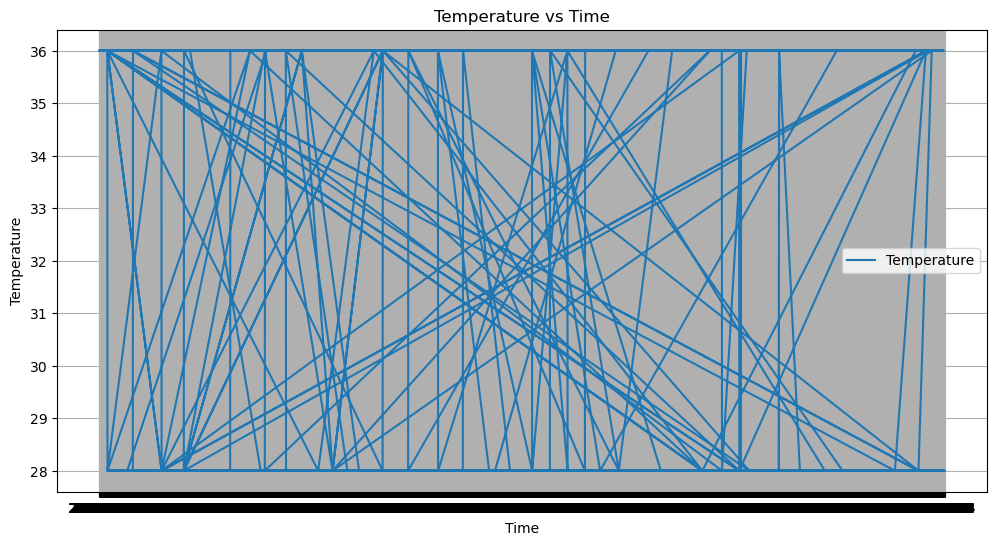

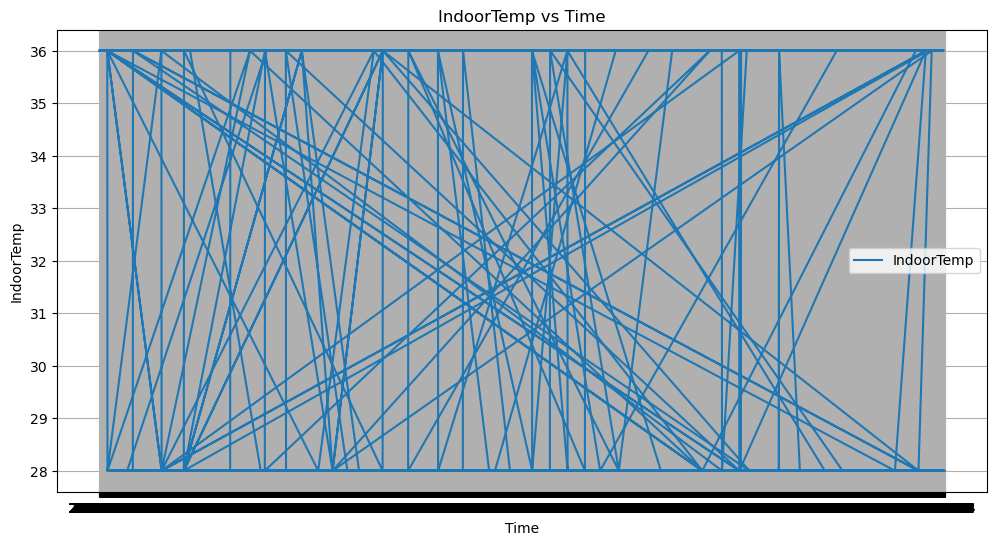

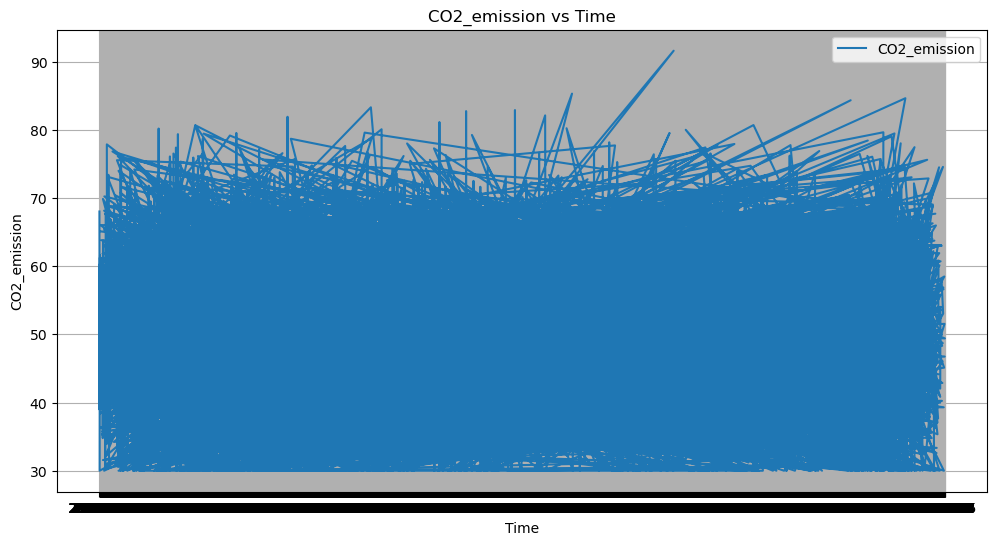

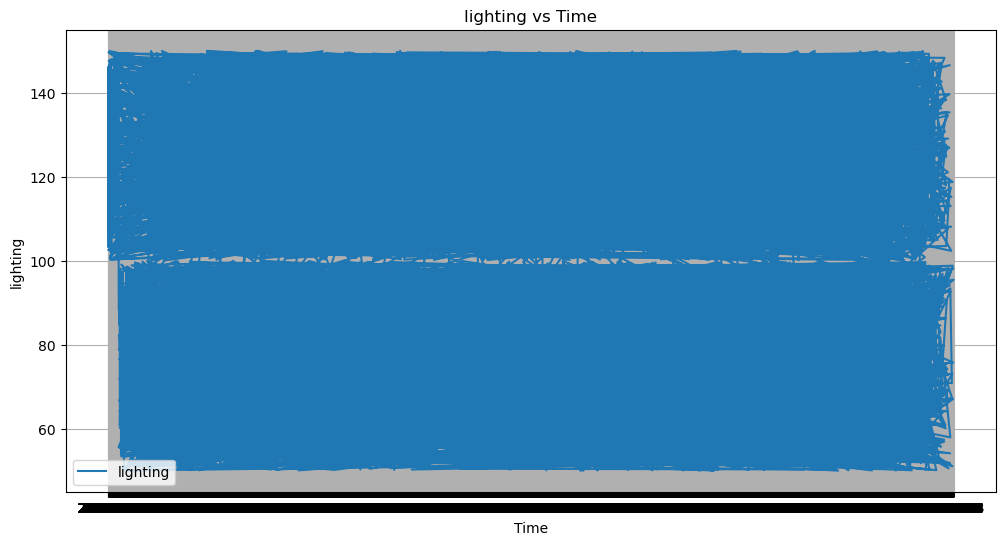

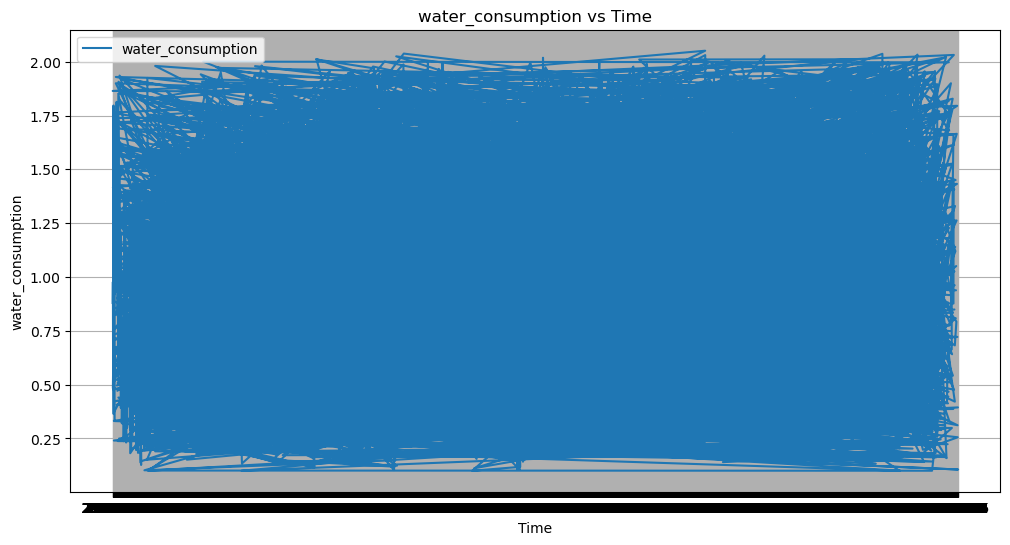

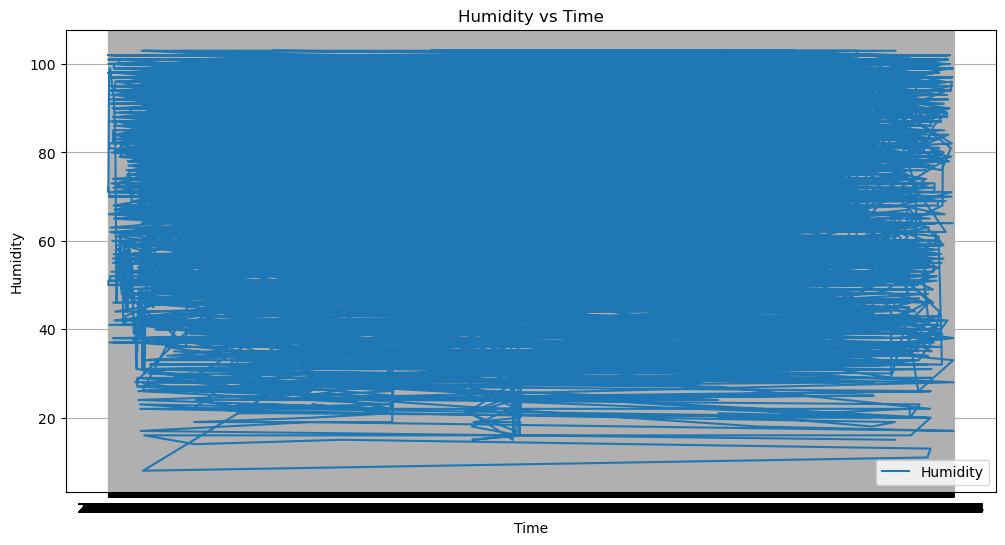

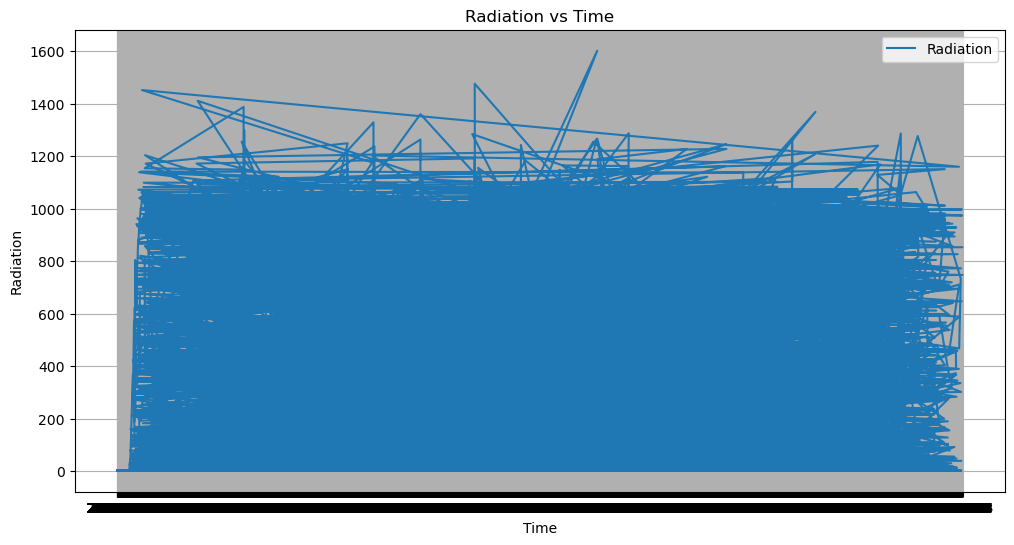

In [6]:
# Convert 'Time' column to datetime for better visualization
#df['Time'] = pd.to_datetime(df['Time'])#, #format='%H:%M:%S')

# Plotting each variable against time
def plot_variable_against_time(df, column):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df[column], label=column)
    plt.title(f'{column} vs Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

# List of columns to plot
columns_to_plot = [
    'Temperature', 'IndoorTemp', 'CO2_emission', 'lighting', 'water_consumption',
    'Humidity', 'Radiation'
]

# Plot each variable against time
for column in columns_to_plot:
    plot_variable_against_time(df, column)

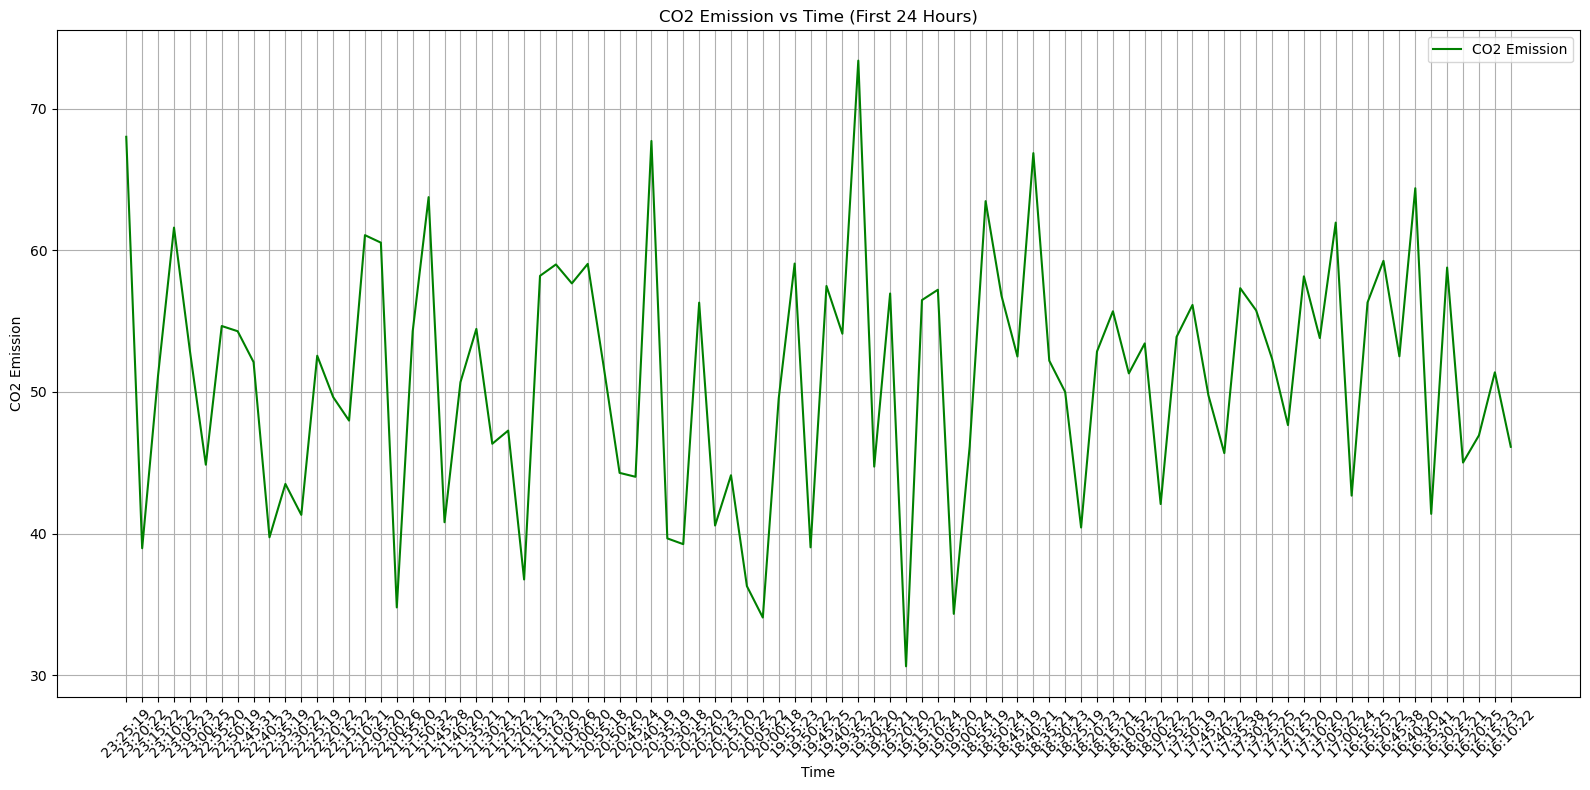

In [11]:
# Convert 'Time' column to datetime
#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')#.dt.time

# Filter data for the first 24 hours
first_24_hours = df.head(88)

# Plot CO2 emissions trend for the first 24 hours
plt.figure(figsize=(16, 8))
plt.plot(first_24_hours['Time'], first_24_hours['CO2_emission'], label='CO2 Emission', color='green')
plt.title('CO2 Emission vs Time (First 24 Hours)')
plt.xlabel('Time')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df = df.dropna()

In [23]:
df['Hour'] = df['Time'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    11610 non-null  object 
 1   Temperature             11610 non-null  int64  
 2   IndoorTemp              11610 non-null  int64  
 3   CO2_emission            11610 non-null  float64
 4   lighting                11610 non-null  float64
 5   water_consumption       11610 non-null  float64
 6   Humidity                11610 non-null  int64  
 7   Radiation               11610 non-null  float64
 8   Pressure                11610 non-null  float64
 9   WindDirection(Degrees)  11610 non-null  float64
 10  Speed                   11610 non-null  float64
 11  Temperature_lag1        11610 non-null  int64  
 12  IndoorTemp_lag1         11610 non-null  int64  
 13  Temperature_lag2        11610 non-null  int64  
 14  IndoorTemp_lag2         11610 non-null

In [14]:
def calculate_energy_consumption(row):
    base_consumption = 50  # Base energy consumption in kWh
    temp_factor = (row['Temperature'] - 22) ** 2 + (row['IndoorTemp'] - 22) ** 2  # Temperature impact
    lighting_factor = row['lighting'] * 0.1  # Lighting impact
    occupancy_factor = 100 if row['Occupancy'] == 1 else 20  # Higher consumption when occupied
    
    # Energy consumption increases during working hours (8 AM to 6 PM)
    if 8 <= row['Time'].hour <= 18:
        time_factor = 1.2
    else:
        time_factor = 0.8
    
    # Calculate total energy consumption
    energy_consumption = base_consumption + temp_factor + lighting_factor + occupancy_factor
    energy_consumption *= time_factor
    return energy_consumption

In [15]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Assuming 'Occupancy' column exists
# Calculate energy consumption and add it as a new column
df['Energy_Consumption'] = df.apply(calculate_energy_consumption, axis=1)

# Save the updated dataset to a new CSV file
df.to_csv('updated_weather_dataset_with_energy.csv', index=False)

# Display the first few rows of the updated dataset
print(df.head())

       Time  Temperature  IndoorTemp  CO2_emission    lighting  \
0  23:25:19           36          36     68.008508  143.881059   
1  23:20:22           36          36     38.959805  146.166361   
2  23:15:22           36          36     51.180025  103.181242   
3  23:10:22           36          36     61.597444  137.347090   
4  23:05:23           36          36     52.888832  116.772821   

   water_consumption  Humidity  Radiation  Pressure  WindDirection(Degrees)  \
0           0.879535        72       1.20     30.46                  112.45   
1           0.976914        71       1.24     30.46                  122.97   
2           0.620815        80       1.23     30.46                  101.18   
3           0.477927        85       1.21     30.46                  141.87   
4           1.796451        93       1.23     30.47                  120.55   

   Speed  Temperature_lag1  IndoorTemp_lag1  Temperature_lag2  \
0   6.75                36               36                36  

In [25]:
features = ['CO2_emission', 'Temperature', 'Humidity', 'Energy_Consumption', 'lighting']
target = 'Occupancy' 
X = df[features]
y = df[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"MSE : {mse}")
print(f"R2 Score : {r2}")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

MSE : 0.0
R2 Score : 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [39]:
# Convert 'Time' column to datetime if it's not already in that format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Define the function to determine occupancy based on the time of day
def determine_occupancy(time):
    hour = time.hour
    if 20 <= hour or hour < 7:
        return 0  # No occupants between 8 PM and 7 AM
    elif 7 <= hour < 9:
        return 50  # Low occupancy between 7 AM and 9 AM
    elif 9 <= hour < 11.5:
        return 180  # Near maximum occupancy between 9 AM and 11:30 AM
    elif 13 <= hour < 16:
        return 180  # Near maximum occupancy between 1 PM and 4 PM
    elif 16.5 <= hour < 20:
        return 50  # Decreasing occupancy between 4:30 PM and 8 PM
    else:
        return 0  # Default to 0 for any other times not covered (shouldn't be necessary with the above ranges)

# Apply the function to the DataFrame
df['Occupancy'] = df['Time'].apply(determine_occupancy)

# Save the updated dataset to a new CSV file
df.to_csv('updated_weather_dataset_with_occupancy1.csv', index=False)

# Display the first few rows of the updated dataset
df.head(100)

,Time,Temperature,IndoorTemp,CO2_emission,lighting,water_consumption,Humidity,Radiation,Pressure,WindDirection(Degrees),Speed,Temperature_lag1,IndoorTemp_lag1,Temperature_lag2,IndoorTemp_lag2,Temperature_lag3,IndoorTemp_lag3,Occupancy,Energy_Consumption
0,23:25:19,36,36,68.008508,143.881059,0.879535,72,1.20,30.46,112.45,6.75,36,36,36,36,36,36,0,381.110485
1,23:20:22,36,36,38.959805,146.166361,0.976914,71,1.24,30.46,122.97,5.62,36,36,36,36,36,36,0,381.293309
2,23:15:22,36,36,51.180025,103.181242,0.620815,80,1.23,30.46,101.18,4.50,36,36,36,36,36,36,0,441.854499
3,23:10:22,36,36,61.597444,137.347090,0.477927,85,1.21,30.46,141.87,4.50,36,36,36,36,36,36,0,380.587767
4,23:05:23,36,36,52.888832,116.772821,1.796451,93,1.23,30.47,120.55,2.25,36,36,36,36,36,36,0,442.941826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15:30:20,28,28,63.334167,61.221997,0.251778,51,670.32,30.42,53.16,4.50,36,36,36,36,36,36,180,273.746640
96,15:25:21,28,28,43.041018,91.430087,0.514722,48,679.73,30.42,353.87,9.00,36,36,36,36,36,36,180,181.371610
97,15:20:24,28,28,38.331587,61.200136,0.487463,54,687.62,30.43,2.04,4.50,36,36,36,36,36,36,180,177.744016
98,15:15:18,28,28,43.995224,55.089410,0.267909,53,697.66,30.42,34.85,11.25,36,36,36,36,36,36,180,273.010729
